# Quality Inspection of the Workpiece

## CS5102 - DIP Project

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 

## Problem statement

## Libraries

In [57]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath
from PIL import Image, ImageOps

from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
import scipy.ndimage as nd

### Reading Input Grayscale Image

No. of Images =  8


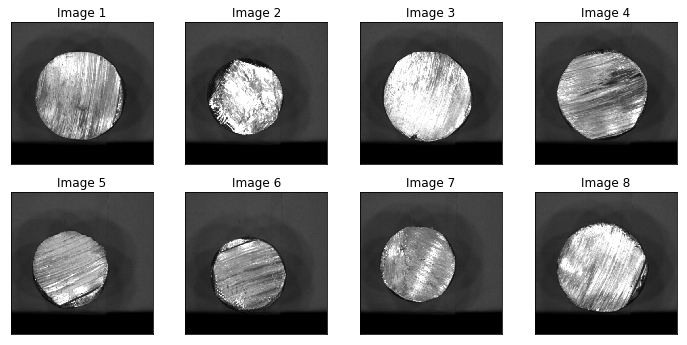

In [58]:
#Reading input image
#Input list of images from path

images = [Image.open(file) for file in glob.glob("./dataset/*.BMP")]
print("No. of Images = ", len(images))

gray_images=[]
rgb_images=[]
new_width=500
new_height=500

plt.rcParams["figure.figsize"]=12,12
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
    
for i in range(len(gray_images)):    
    plt.subplot(4,4,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()

In [59]:
img=gray_images[6]

### Thresholding

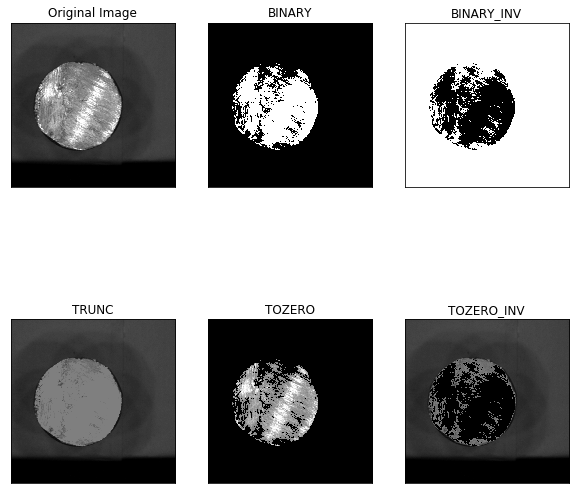

In [60]:
## Simple Thresholding

# For every pixel, the same threshold value is applied. 
# If the pixel value is smaller than the threshold, it is set to 0, 
# otherwise it is set to a maximum value. The function cv.threshold 
# is used to apply the thresholding. The first argument is the source image, 
# which should be a grayscale image. The second argument is the threshold 
# value which is used to classify the pixel values. The third argument is 
# the maximum value which is assigned to pixel values exceeding the threshold.

plt.rcParams["figure.figsize"]=10,10
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
thresh_images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(thresh_images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

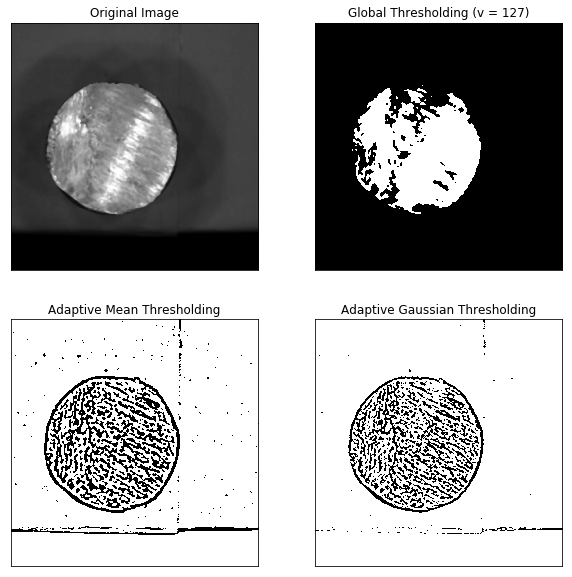

In [61]:
## Adaptive Thresholding

# In the previous section, we used one global value as a threshold. 
# But this might not be good in all cases, e.g. if an image has different 
# lighting conditions in different areas. In that case, 
# adaptive thresholding can help. Here, the algorithm determines the 
# threshold for a pixel based on a small region around it. 
# So we get different thresholds for different regions of the same image 
# which gives better results for images with varying illumination.

# The adaptiveMethod decides how the threshold value is calculated:
## cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
## cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

# The blockSize determines the size of the neighbourhood area and C is a 
# constant that is subtracted from the mean or weighted sum of the 
# neighbourhood pixels.

img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
aThresh_images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(aThresh_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


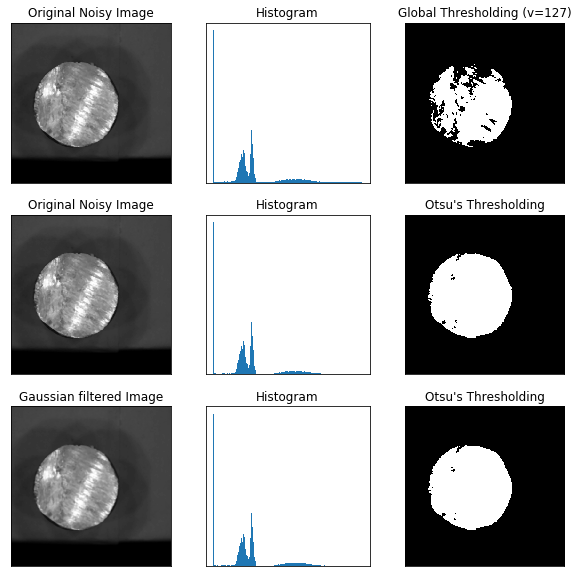

In [62]:
## Otsu's Binarization

# In global thresholding, we used an arbitrary chosen value as a threshold. 
# In contrast, Otsu's method avoids having to choose a value and determines 
# it automatically.

# Consider an image with only two distinct image values (bimodal image), 
# where the histogram would only consist of two peaks. A good threshold 
# would be in the middle of those two values. Similarly, Otsu's method 
# determines an optimal global threshold value from the image histogram.

# In order to do so, the cv.threshold() function is used, 
# where cv.THRESH_OTSU is passed as an extra flag. The threshold value can 
# be chosen arbitrary. The algorithm then finds the optimal threshold value 
# which is returned as the first output.

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
oThresh_images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(oThresh_images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(oThresh_images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(oThresh_images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


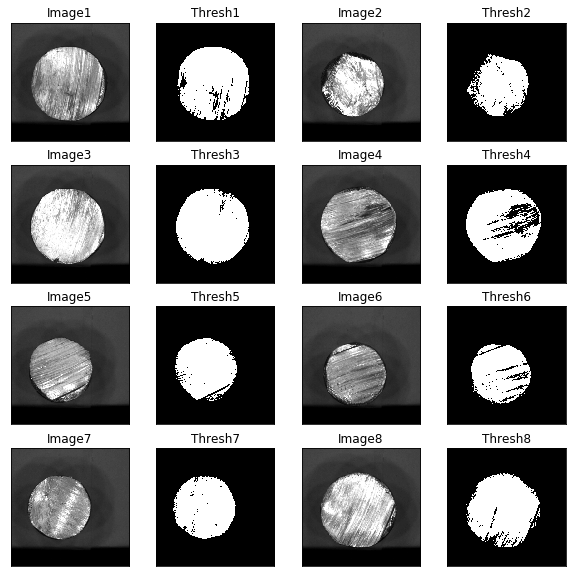

In [63]:
## Otsu's Thresholding on all images

grayThresh=[]

for i in range(len(gray_images)):    
    img=gray_images[i]
    # Otsu's thresholding
    ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    grayThresh.append(th)
    plt.subplot(4,4,i*2+1),plt.imshow(img,'gray')
    plt.title("Image"+str(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*2+2),plt.imshow(th,'gray')
    plt.title("Thresh"+str(i+1)), plt.xticks([]), plt.yticks([])
plt.show()

### Detection

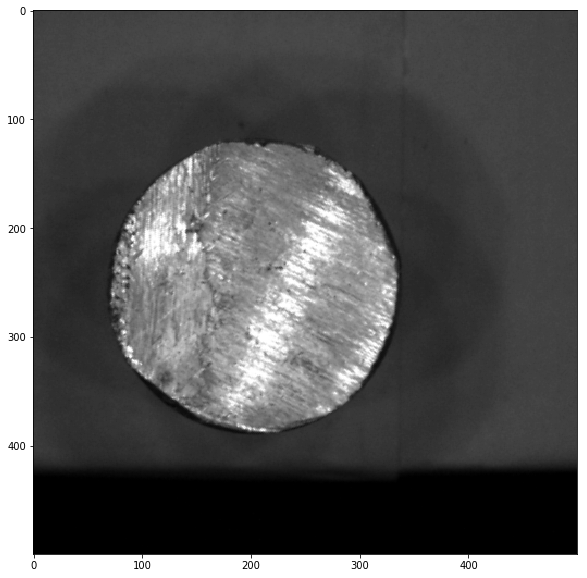

In [64]:
img=grayThresh[6]

## Drawing Contours using CHAIN_APPROX_NONE

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = gray_images[6].copy()
#cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(image_copy,'gray')
plt.show()
#cv2.imshow('None approximation', image_copy)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


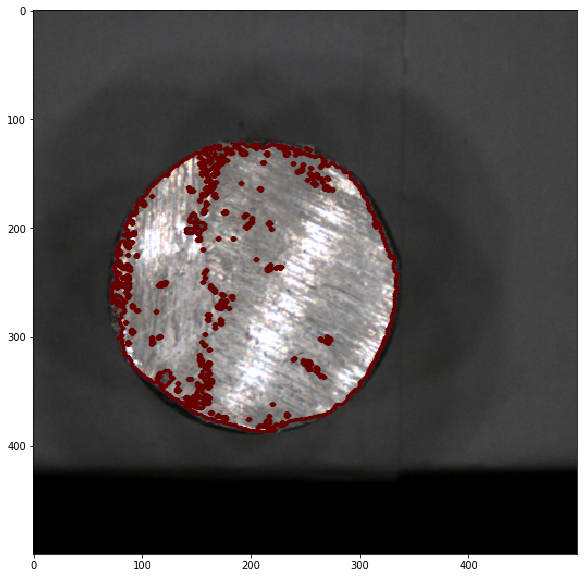

In [65]:
## Drawing Contours using CHAIN_APPROX_SIMPLE

# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = rgb_images[6].copy()
cv2.drawContours(image_copy1, contours1, -1, (100, 0, 0), 2, cv2.LINE_AA)

# see the results
plt.imshow(image_copy1,'gray')
plt.show()

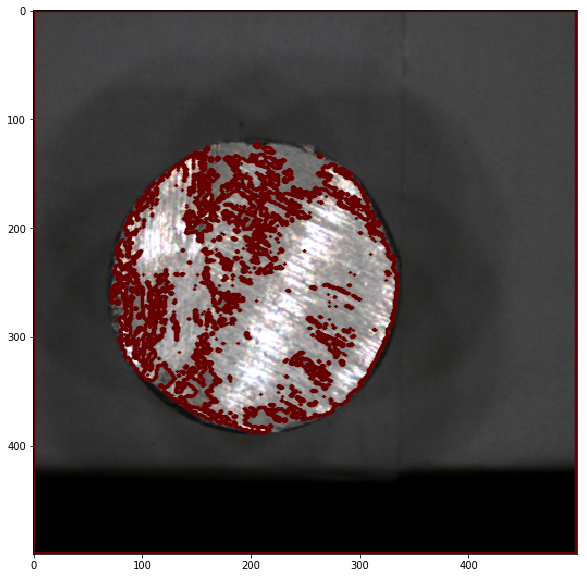

In [66]:
## Drawing Contours using CHAIN_APPROX_SIMPLE
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = rgb_images[6].copy()
cv2.drawContours(image_copy1, contours1, -1, (100, 0, 0), 2, cv2.LINE_AA)

# see the results
plt.imshow(image_copy1,'gray')
plt.show()



In [67]:
# copy_imgs=gray_images
# for i in range(len(rgb_images)):    
#     imgray=gray_images[i]
#     #imgray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
#     cont, hier = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(imgray, cont, -1, (100, 0, 0), 3)

#     plt.subplot(4,4,i*2+1),plt.imshow(rgb_images[i],'gray')
#     plt.title("Image"+str(i+1)), plt.xticks([]), plt.yticks([])
#     plt.subplot(4,4,i*2+2),plt.imshow(imgray,'gray')
#     plt.title("Contour"+str(i+1)), plt.xticks([]), plt.yticks([])
# plt.show()
# np.shape(gray_images)

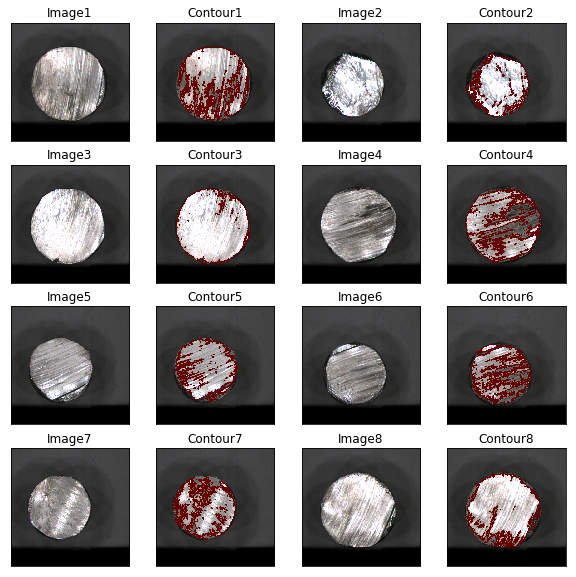

In [68]:
contours_list=[]
for i in range(len(rgb_images)):    
    imCopy=rgb_images[i].copy()
    imgray=cv2.cvtColor(rgb_images[i],cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours_list.append(contours)
    cv2.drawContours(imCopy,contours,-1,(100,0,0), 3)
    plt.subplot(4,4,i*2+1),plt.imshow(rgb_images[i],'gray')
    plt.title("Image"+str(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*2+2),plt.imshow(imCopy,'gray')
    plt.title("Contour"+str(i+1)), plt.xticks([]), plt.yticks([])
plt.show()

### Sobel edge detection

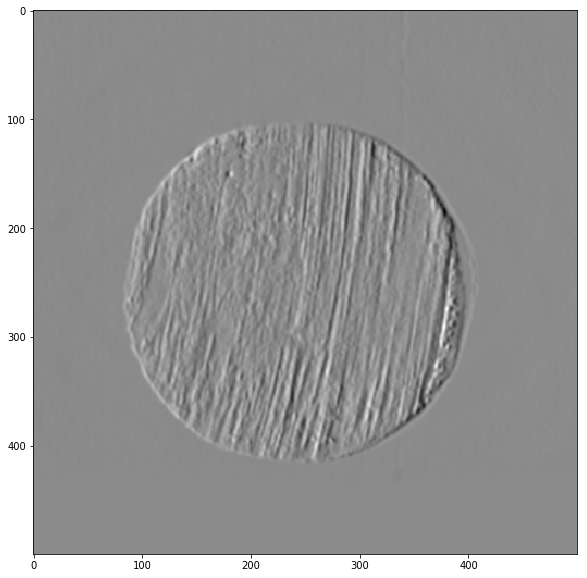

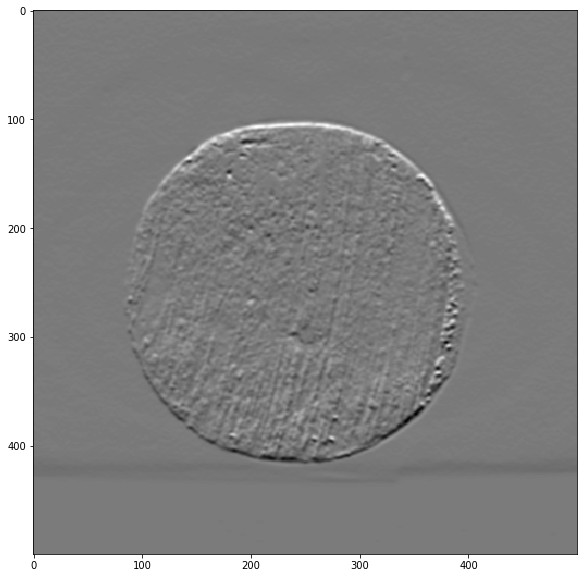

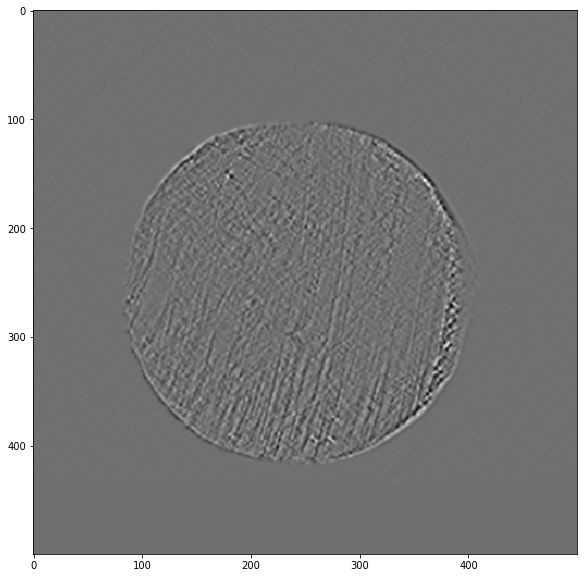

In [69]:
img_blur = cv2.GaussianBlur(gray_images[0], (3,3), 0)
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 

plt.imshow(sobelx, 'gray')
plt.show()

plt.imshow(sobely, 'gray')
plt.show()

plt.imshow(sobelxy, 'gray')
plt.show()

### edge-based segmentation

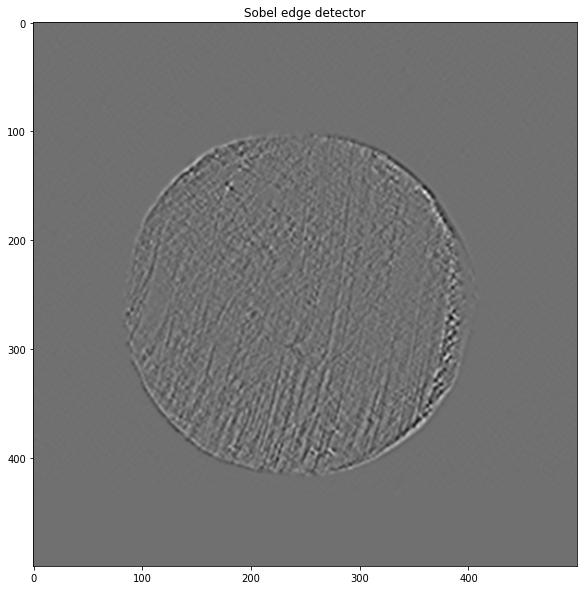

In [76]:
plt.imshow(sobelxy,'gray',interpolation='gaussian')
plt.title('Sobel edge detector')
plt.show()



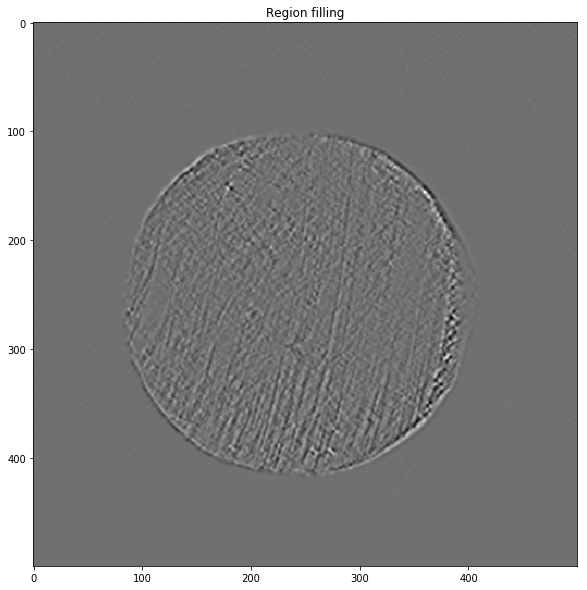

In [77]:
fill_im=nd.binary_fill_holes(sobelxy)
plt.imshow(sobelxy, 'gray')
plt.title('Region filling')

plt.show()

### circle detection

In [97]:
# gray = sobelxy

# # Blur using 3 * 3 kernel.
# gray_blurred = cv2.blur(gray, (3, 3))
# print(gray_blurred.dtype)

# gray_blurred=cv2.normalize(src=gray_blurred, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# print(gray_blurred.dtype)

# # Apply Hough transform on the blurred image.
# detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,param2 = 30, minRadius = 1, maxRadius = 700)

# # Draw circles that are detected.
# if detected_circles is not None:

#     # Convert the circle parameters a, b and r to integers.
#     detected_circles = np.uint16(np.around(detected_circles))

#     for pt in detected_circles[0, :]:
#         a, b, r = pt[0], pt[1], pt[2]
  
#         # Draw the circumference of the circle.
#         cv2.circle(img, (a, b), r, (255,0, 0), 2)
  
#         # Draw a small circle (of radius 1) to show the center.
#         cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
#         plt.imshow(img)
#         plt.title("Detected Circle")

### Contour comparison

In [71]:
np.shape(np.array(contours_list, dtype=object))
ref_contour=contours_list[2]

ret=cv2.matchShapes(ref_contour[0], contours_list[0][0], 1, 0.0)
ret

1.7976931348623157e+308

### template matching

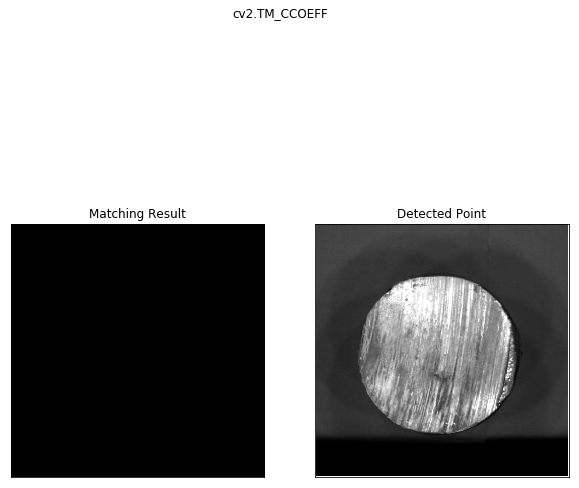

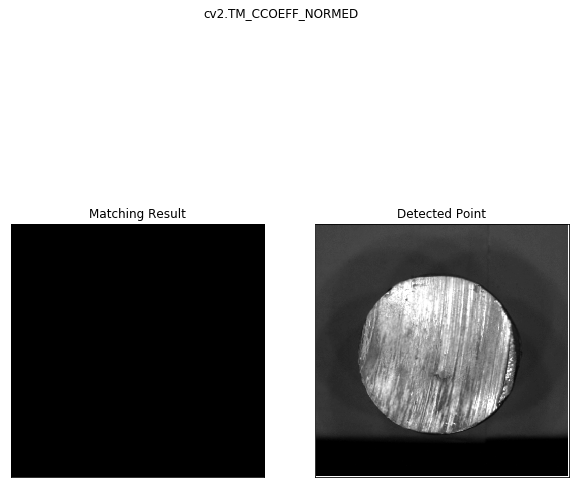

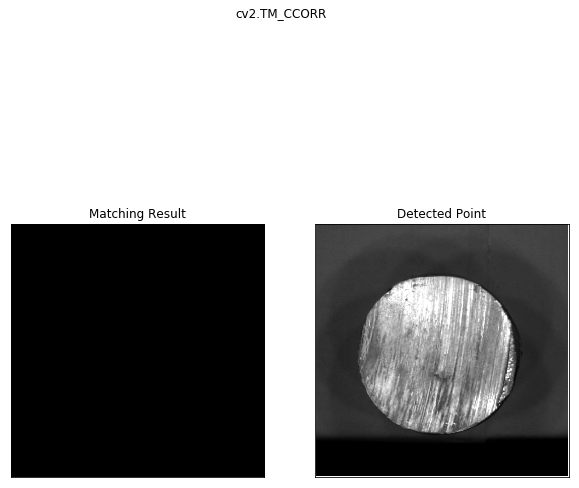

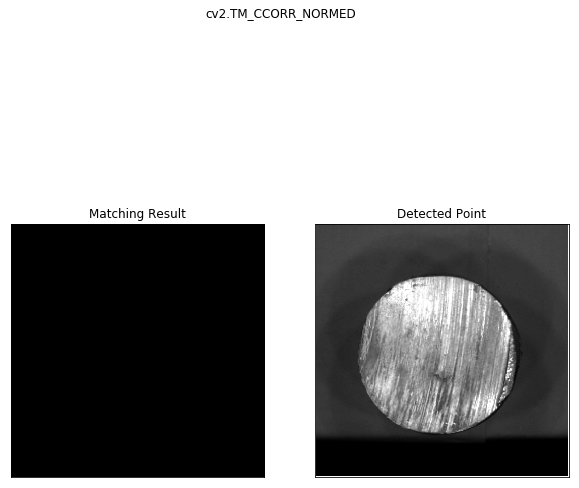

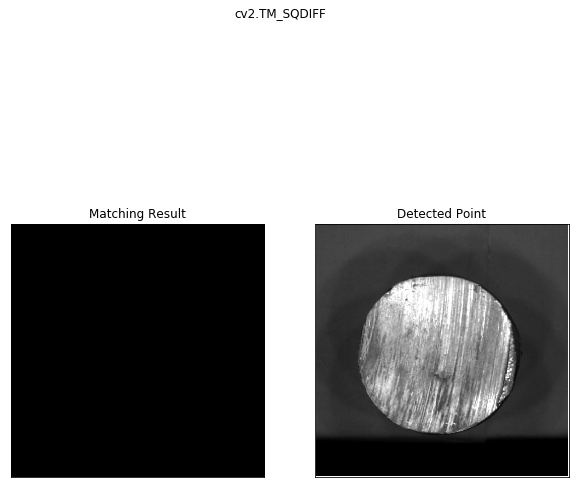

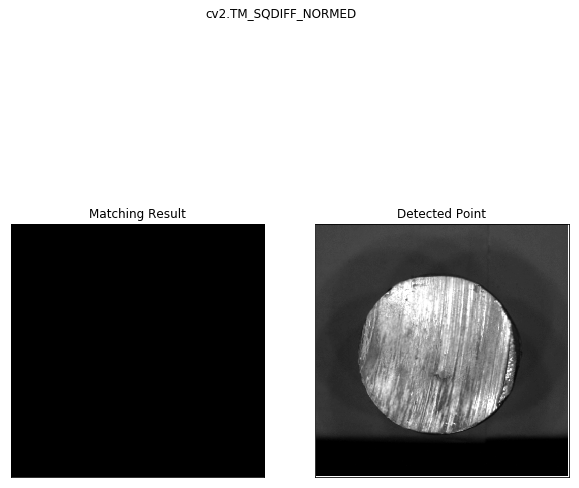

In [100]:
#img = cv.imread('messi5.jpg',0)
img2 = gray_images[0].copy()
template = gray_images[2]
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008

W. Sriratana, N. Narknam, R. Apichitanon and N. Tammarugwattana, "Application of Webcam for Inspection of Rice Grain Quality by Using Image Processing Technique," 2020 20th International Conference on Control, Automation and Systems (ICCAS), 2020, pp. 1134-1139, doi: 10.23919/ICCAS50221.2020.9268316.

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  

https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  



In [72]:
print(cv2.__version__)

4.5.5
